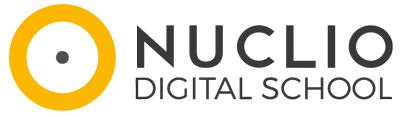

**Proyecto Health Analytics para el estudio de la salud pública**

**DESCRIPCIÓN DEL PROYECTO**


Análisis en países desarrollados y subdesarrollados de la relación entre la esperanza de vida, las principales causas de muerte, el gasto en salud, el PIB per cápita, tasas de vacunación, niveles de pobreza, y las tasas de homicidios y suicidios en diferentes países. Este proyecto busca entender cómo los factores socioeconómicos y de salud pública influyen en la calidad y expectativa de vida a nivel global. Además, los resultados del análisis se complementarán con la implementación de un modelo simple que ayude a entender los factores de vida que impactan en la esperanza de vida de un país,  y diseñar un dashboard para la WHO con los principales resultados del análisis. 


# 0. Import data

### 1) Import libraries

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

"""pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)"""

"pd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)"

#### Funciones

##### Check df

In [2]:
def check_df(df, tipo):
  # tipo == 'simple' - Solo muestra volumenes y cabecera
  if tipo == 'simple':
    print("¿Cuántas filas y columnas hay en el conjunto de datos?")
    num_filas, num_columnas = df.shape
    print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
    print('\n########################################################################################')

    print("¿Cuáles son las primeras dos filas del conjunto de datos?")
    display(df.head(2))
    print('\n########################################################################################')

  else:
    print("¿Cuántas filas y columnas hay en el conjunto de datos?")
    num_filas, num_columnas = df.shape
    print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
    print('\n########################################################################################')

    print("¿Cuáles son las primeras dos filas del conjunto de datos?")
    display(df.head(2))
    print('\n########################################################################################')

    print("¿Cuáles son las últimas dos filas del conjunto de datos?")
    display(df.tail(2))
    print('\n########################################################################################')

    print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
    display(df.sample(2))
    print('\n########################################################################################')

    print("¿Cuáles son las columnas del conjunto de datos?")
    for i in list(df.columns):
      print('\t - ' + i)
    print('\n########################################################################################')

    print("¿Cuál es el tipo de datos de cada columna?")
    print(df.dtypes)
    print('\n########################################################################################')

    print("¿Cuántas columnas hay de cada tipo de datos?")
    print(df.dtypes.value_counts())
    print('\n########################################################################################')

    print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
    print(df.info())
    print('\n########################################################################################')

    print("¿Cuántos valores únicos tiene cada columna?")
    print(df.nunique())
    print('\n########################################################################################')

    print("¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?")
    display(df.describe(include = 'all').fillna(''))
    print('\n########################################################################################')

    print("¿Hay valores nulos en el conjunto de datos?")
    print(df.isnull().sum().sort_values(ascending = False))
    print('\n########################################################################################')

    print("¿Cuál es el porcentaje de valores nulos en cada columna?")
    print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
    print('\n########################################################################################')

####################################################################################################################

##### Graficas

In [3]:
def graficar_boxplot_px(df, variable_analisis):
    # Crear el boxplot usando Plotly Express
    fig = px.box(df, y=variable_analisis)

    # Actualizar títulos del gráfico
    fig.update_layout(title=f'Boxplot: {variable_analisis}',
                      yaxis_title='Frecuencia')

    # Actualizar el fondo del gráfico a blanco
    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })

    # Mostrar el gráfico
    fig.show()

####################################################################################################################

def graficar_boxplot_bivariable_px (df, variable_analisis, variable_categorica):
    # Crear el boxplot usando Plotly Express
    fig = px.box(df, x=variable_categorica, y=variable_analisis, color=variable_categorica) 

    # Actualizar títulos del gráfico
    fig.update_layout(title=f'Boxplot de {variable_analisis} por {variable_categorica}',
                      xaxis_title=variable_categorica,
                      yaxis_title=variable_analisis)

    # Actualizar el fondo del gráfico a blanco
    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })

    # Mostrar el gráfico
    fig.show()

####################################################################################################################


In [4]:
def graficar_histplot(df, variable_analisis):
  sns.histplot(
      data=df,
      x=variable_analisis,
      bins="auto",  # "auto", 10, 20, 200
  )

  # Calcular media y mediana
  mean_val = df[variable_analisis].mean()
  median_val = df[variable_analisis].median()

  # Añadir línea de media
  plt.axvline(mean_val, color='r', linestyle='--', label=f'Media: {mean_val:.2f}')
  # Añadir línea de mediana
  plt.axvline(median_val, color='black', linestyle=':', label=f'Mediana: {median_val:.2f}')

  plt.title(f'Distribución de: {variable_analisis}')
  plt.xlabel(variable_analisis)
  plt.ylabel('Frecuencia')
  plt.legend()

  plt.show()
  
####################################################################################################################


In [5]:
def graficar_barras_px(df, variable_analisis):
    # Contar la frecuencia de la variable de análisis
    volumen = df[variable_analisis].value_counts().reset_index()
    volumen.columns = [variable_analisis, 'Volúmen']

    # Crear el gráfico de barras
    fig = px.bar(volumen, x=variable_analisis, y='Volúmen', text='Volúmen')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(title_text=f'Gráfico de barras: {variable_analisis}',
                      xaxis_title=variable_analisis,
                      yaxis_title='Volúmen',
                      xaxis={'categoryorder':'total descending'})

    # Actualizar el fondo del gráfico a blanco
    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })

    fig.show()

In [6]:
def graficar_barras_px_legend(df, variable_analisis, variable_analisis2):
    # Contar la frecuencia de la variable de análisis
    volumen = df[variable_analisis].value_counts().reset_index()
    volumen.columns = [variable_analisis, 'Volúmen']

    # Crear el gráfico de barras
    fig = px.bar(volumen, x=variable_analisis, y='Volúmen', text='Volúmen')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(title_text=f'Gráfico de barras: {variable_analisis}',
                      xaxis_title=variable_analisis,
                      yaxis_title='Volúmen',
                      xaxis={'categoryorder':'total descending'},
                      color=variable_analisis2)

    # Actualizar el fondo del gráfico a blanco
    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })

    fig.show()

##### Tabla correlaciones

In [7]:
def realizar_correlaciones(df, listado_variables):
    sns.heatmap(df[listado_variables].corr(), annot = True)

In [8]:
def correlaciones(analysis, df1):
    # Make sure that 'analysis' starts with "neighbourhood_group" and then  "price"
    df_analysis = df1[analysis]
    df_corr = (
        df_analysis
        .groupby("Entity")
        [analysis[3:]]
        .corr(method="spearman")
        .reset_index(names=["ID", "feature"])
        .query("feature == 'price'")
        .drop(columns=["price", "feature"])
        .sort_values(analysis[2], ascending=False)
    )

    print(f"Valor minimo correlacion: {df_corr.min()}")
    print(f"Valor maximo correlacion: {df_corr.max()}")

    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr.set_index("neighbourhood_group"), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Mapa de calor de correlaciones')

    return plt.show()

##### Outliers

In [9]:
def obtener_outliers(df):
    # Obtener la lista de todos los países en el conjunto de datos
    paises = df['Entity'].unique()

    # Obtener las columnas que contienen datos de muertes
    columns_to_analyze = df.columns.difference(['Entity', 'Code', 'Year'])

    # Crear un diccionario para almacenar los outliers de cada país por cada causa
    outliers_dict = {}

    # Iterar sobre cada país
    for pais in paises:
        # Filtrar los datos para el país especificado
        pais_data = df[df['Entity'] == pais]

        # Verificar si hay datos para el país especificado
        if pais_data.empty:
            print(f"No data found for {pais}")
            continue

    
       

        # Iterar sobre cada columna (causa)
        for column in columns_to_analyze:
            # Calcular el IQR (rango intercuartílico) para la causa específica
            Q1 = pais_data[column].quantile(0.25)
            Q3 = pais_data[column].quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtrar los outliers
            outliers = pais_data[(pais_data[column] < lower_bound) | 
                                 (pais_data[column] > upper_bound)]

            if not outliers.empty:
                # Ordenar los outliers y seleccionar los diez últimos
                last_ten_outliers = outliers.sort_values(by=column, ascending=False).tail(10)
                # Almacenar los outliers en el subdiccionario
                outliers_dict[(pais, column)] = last_ten_outliers

    lista_pais = []
    lista_column = []
    lista_outliers = []

    for (pais, column), outliers in outliers_dict.items():
        lista_pais.append(pais)
        lista_column.append(column)
        lista_outliers.append(outliers)

    df_outliers = pd.DataFrame({'pais': lista_pais, 'variable': lista_column, 'outliers': lista_outliers})


    return df_outliers

### 2) Paths & directories

tories

In [10]:
data_folder = r'D:\Documents\1. Academic studies\NuclioSchool\Proyecto Final\data'

annual_number_of_deaths_by_cause_path = data_folder + '/annual_number_of_deaths_by_cause.csv'
death_rate_from_suicides_gho_path = data_folder + '/death_rate_from_suicides_gho.csv'
gdp_per_capita_penn_world_table_path = data_folder + '/gdp_per_capita_penn_world_table.csv'
global_vaccination_coverage_path = data_folder + '/global_vaccination_coverage.csv'
homicide_rate_unodc_path = data_folder + '/homicide_rate_unodc.csv'
life_expectancy_path = data_folder + '/life_expectancy.csv'
poverty_explorer_path = data_folder + '/poverty_explorer.csv'
public_healthcare_spending_share_gdp_path = data_folder + '/public_healthcare_spending_share_gdp.csv'


### 3) Quick data exploration 

Exploración inicial de los distintos conjuntos de datos de forma individual.

#### Deaths

In [11]:
# Dataset for deaths
print("Dataset for deaths ")
df_deaths = pd.read_csv(annual_number_of_deaths_by_cause_path)
print(f'Shape of the dataset for deaths: {df_deaths.shape}')

print(f'\nNumber of countries in the data: {df_deaths["Code"].nunique()}')
print(f'Number of years available in the data: {df_deaths["Year"].nunique()}')

display(df_deaths.head())


Dataset for deaths 
Shape of the dataset for deaths: (6840, 34)

Number of countries in the data: 205
Number of years available in the data: 30


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


#### Suicides

In [12]:
# Dataset for suicides
print("Dataset for suicides ")
df_suicides = pd.read_csv(death_rate_from_suicides_gho_path)
print(f'Shape of the dataset for deaths: {df_suicides.shape}')

print(f'\nNumber of countries in the data: {df_suicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_suicides["Year"].nunique()}')

display(df_suicides.head())


Dataset for suicides 
Shape of the dataset for deaths: (3880, 4)

Number of countries in the data: 184
Number of years available in the data: 20


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Afghanistan,AFG,2000,7.71
1,Afghanistan,AFG,2001,7.89
2,Afghanistan,AFG,2002,7.85
3,Afghanistan,AFG,2003,7.72
4,Afghanistan,AFG,2004,7.77


#### GDP per capita

In [13]:
# Dataset for GDP_per_capita
print("Dataset for GDP")
df_gdp = pd.read_csv(gdp_per_capita_penn_world_table_path)
print(f'Shape of the dataset for GDP: {df_gdp.shape}')

print(f'\nNumber of countries in the data: {df_gdp["Code"].nunique()}')
print(f'Number of years available in the data: {df_gdp["Year"].nunique()}')

display(df_gdp.head())


Dataset for GDP
Shape of the dataset for GDP: (10108, 4)

Number of countries in the data: 182
Number of years available in the data: 70


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730


#### Vaccination

In [14]:
# Dataset for vaccination
print("Dataset for vaccination")
df_vaccination = pd.read_csv(global_vaccination_coverage_path)
print(f'Shape of the dataset for vaccination: {df_vaccination.shape}')

print(f'\nNumber of countries in the data: {df_vaccination["Code"].nunique()}')
print(f'Number of years available in the data: {df_vaccination["Year"].nunique()}')

display(df_vaccination.head())


Dataset for vaccination
Shape of the dataset for vaccination: (7897, 14)

Number of countries in the data: 196
Number of years available in the data: 42


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


#### Homicides

In [15]:
# Dataset for homicides
print("Dataset for homicides")
df_homicides = pd.read_csv(homicide_rate_unodc_path)
print(f'Shape of the dataset for homicides: {df_homicides.shape}')

print(f'\nNumber of countries in the data: {df_homicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_homicides["Year"].nunique()}')

display(df_homicides.head())


Dataset for homicides
Shape of the dataset for homicides: (4204, 4)

Number of countries in the data: 201
Number of years available in the data: 32


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262


#### Life expectancy

In [16]:
# Dataset for life_expectancy
print("Dataset for life expectancies")
df_life_expec = pd.read_csv(life_expectancy_path)
print(f'Shape of the dataset for life expectancies: {df_life_expec.shape}')

#print(f'\nNumber of countries in the data: {df_life_expec["Code"].nunique()}')
#print(f'Number of years available in the data: {df_life_expec["Year"].nunique()}')

display(df_life_expec.head())


Dataset for life expectancies
Shape of the dataset for life expectancies: (20755, 4)


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


#### Poverty

In [17]:
# Dataset for poverty
print("Dataset for poverty")
df_poverty = pd.read_csv(poverty_explorer_path)
print(f'Shape of the dataset for poverty: {df_poverty.shape}')

print(f'\nNumber of countries in the data: {df_poverty["Country"].nunique()}')
print(f'Number of years available in the data: {df_poverty["Year"].nunique()}')


display(df_poverty.head())


Dataset for poverty
Shape of the dataset for poverty: (2602, 109)

Number of countries in the data: 192
Number of years available in the data: 60


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,...,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,...,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
2,Albania,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.405670,98.85736,99.546940,...,11.115035,13.596755,22.311052,29.289268,46.369564,1.142718,4.662236,3.874336,1.979621,1.957110
3,Albania,2008,0.000000,0.199925,3.902613,33.431850,62.768870,94.582830,98.50923,99.344450,...,11.974607,14.590684,24.551666,29.854542,45.687150,1.114657,4.395911,3.574216,1.957677,1.825743
4,Albania,2012,0.024101,0.620691,4.805442,36.667750,65.062386,95.520160,99.07353,99.742485,...,11.699819,14.170336,21.827140,30.110823,46.954838,1.041193,4.272574,3.630154,1.942752,1.868563


#### Public Health spending

In [18]:
# Dataset for public healthcare spending
print("Dataset for public healthcare spending")
df_public_health_spend = pd.read_csv(public_healthcare_spending_share_gdp_path)
print(f'Shape of the dataset for poverty: {df_public_health_spend.shape}')

print(f'\nNumber of countries in the data: {df_public_health_spend["Code"].nunique()}')
print(f'Number of years available in the data: {df_public_health_spend["Year"].nunique()}')


display(df_public_health_spend.head())


Dataset for public healthcare spending
Shape of the dataset for poverty: (4014, 4)

Number of countries in the data: 191
Number of years available in the data: 20


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840


# 1. Analisis inicial

Análisis inicial de los datos, para entender distribuciones, comportamientos, y que tipo de tratamientos van a requerir

## Life expectancy

In [19]:
# Dataset for life_expectancy
print(f'Shape of the dataset for life expectancies: {df_life_expec.shape}')
df = df_life_expec.copy()

print(f'\nNumber of countries in the data: {df["Code"].nunique()}')
print(f'Number of years available in the data: {df["Year"].nunique()}')

display(df.head())

Shape of the dataset for life expectancies: (20755, 4)

Number of countries in the data: 238
Number of years available in the data: 313


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


In [20]:
df.query("Year >= 1950").shape

(18504, 4)

In [21]:
print(f"Difference between #Country names - #Country codes:")
df["Entity"].nunique() - df["Code"].nunique()

Difference between #Country names - #Country codes:


23

In [22]:
round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending= False)

Code                                                   8.16
Entity                                                 0.00
Year                                                   0.00
Period life expectancy at birth - Sex: all - Age: 0    0.00
dtype: float64

### Average Life Expectancy per Country

In [23]:
df_ = df.groupby('Code').agg({'Entity': 'nunique', 'Period life expectancy at birth - Sex: all - Age: 0': 'mean'}).reset_index()
df_.rename(columns={"Entity": "Num_Countries", "Period life expectancy at birth - Sex: all - Age: 0": "AVG_Life_expect"}, inplace=True)

df_.head()

,Code,Num_Countries,AVG_Life_expect
0,ABW,1,70.256515
1,AFG,1,45.386733
2,AGO,1,45.086359
3,AIA,1,69.438715
4,ALB,1,68.292307


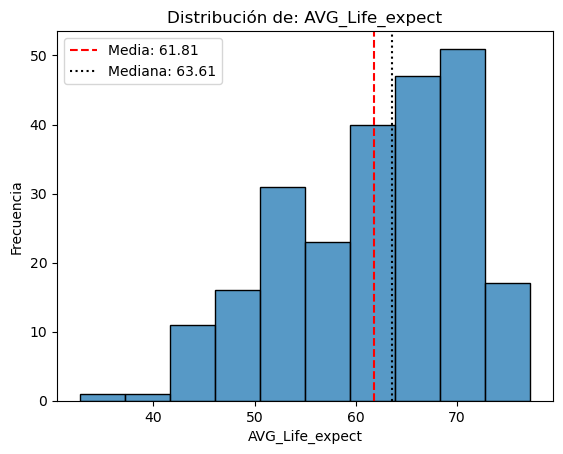

In [24]:
graficar_histplot(df_,"AVG_Life_expect")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


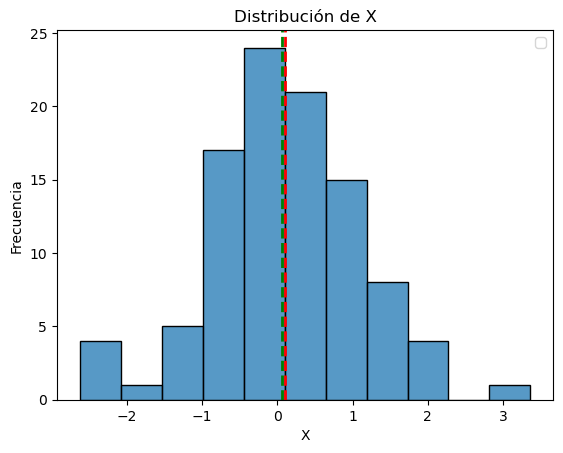

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(100)
#sns.histplot(x)
x = pd.DataFrame(x, columns = ['X'])
def graficar_histplot(df, variable_analisis):
  sns.histplot(data = df,
               x = variable_analisis,
               bins = "auto")
  mean_val = df[variable_analisis].mean()
  median_val = df[variable_analisis].median()
  std_val = df[variable_analisis].std()
  plt.axvline(mean_val, color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(median_val, color = 'green', linestyle = 'dashed', linewidth = 2)
  plt.title(f"Distribución de {variable_analisis}")
  plt.xlabel(variable_analisis)
  plt.ylabel("Frecuencia")
  plt.legend()
  plt.show()
graficar_histplot(x, 'X')

### Average Life Expectancy evolution

In [26]:
df_ = df.groupby('Year').agg({'Entity': 'nunique', 'Period life expectancy at birth - Sex: all - Age: 0': 'mean'}).reset_index()
df_.rename(columns={"Entity": "Num_Countries", "Period life expectancy at birth - Sex: all - Age: 0": "AVG_Life_expect"}, inplace=True)

df_.head(3)

,Year,Num_Countries,AVG_Life_expect
0,1543,1,33.94
1,1548,1,38.82
2,1553,1,39.59


<Axes: xlabel='Year', ylabel='AVG_Life_expect'>

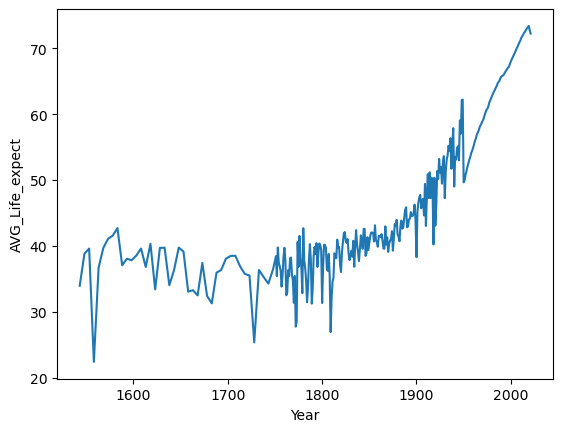

In [27]:
sns.lineplot(data=df_, x="Year", y="AVG_Life_expect")

<Axes: xlabel='Year', ylabel='Num_Countries'>

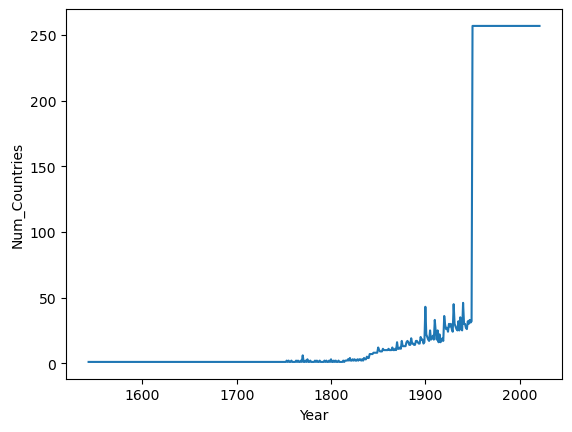

In [28]:
sns.lineplot(data=df_, x="Year", y="Num_Countries")

## Public HC spending

In [29]:
df = df_public_health_spend.copy()

df.head()

,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840


In [30]:
check_df(df,"")

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 4,014 filas y 4 columnas.

########################################################################################
¿Cuáles son las primeras dos filas del conjunto de datos?


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963



########################################################################################
¿Cuáles son las últimas dos filas del conjunto de datos?


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
4012,Zimbabwe,ZWE,2018,2.782935
4013,Zimbabwe,ZWE,2019,1.358270



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
275,Bangladesh,BGD,2018,0.425892
3936,Vietnam,VNM,2008,1.527495



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Entity
	 - Code
	 - Year
	 - Domestic general government health expenditure (% of GDP)

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Entity                                                        object
Code                                                          object
Year                                                           int64
Domestic general government health expenditure (% of GDP)    float64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la 

,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
count,4014,3754,4014.0,4014.0
unique,204,191,,
top,Lesotho,LSO,,
freq,20,20,,
mean,,,2009.514699,3.285109
std,,,5.755692,2.308818
min,,,2000.0,0.062046
25%,,,2005.0,1.545156
50%,,,2010.0,2.677738
75%,,,2014.0,4.5297



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Code                                                         260
Entity                                                         0
Year                                                           0
Domestic general government health expenditure (% of GDP)      0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Code                                                         6.48
Entity                                                       0.00
Year                                                         0.00
Domestic general government health expenditure (% of GDP)    0.00
dtype: float64

########################################################################################


### Average Public HC Spending per Country 

In [31]:
df_ = df.groupby('Code').agg({'Entity': 'nunique', 'Domestic general government health expenditure (% of GDP)': 'mean'}).reset_index()
df_.rename(columns={"Entity": "Num_Countries", "Domestic general government health expenditure (% of GDP)": "AVG_PublicHealthSpending"}, inplace=True)

df_.head()

,Code,Num_Countries,AVG_PublicHealthSpending
0,AFG,1,0.535133
1,AGO,1,1.530134
2,ALB,1,2.593400
3,AND,1,4.012501
4,ARE,1,2.097865


In [32]:
df_.describe()

,Num_Countries,AVG_PublicHealthSpending
count,191.0,191.000000
mean,1.0,3.232761
std,0.0,2.196689
min,1.0,0.349866
25%,1.0,1.579617
50%,1.0,2.708272
75%,1.0,4.402210
max,1.0,13.472462


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


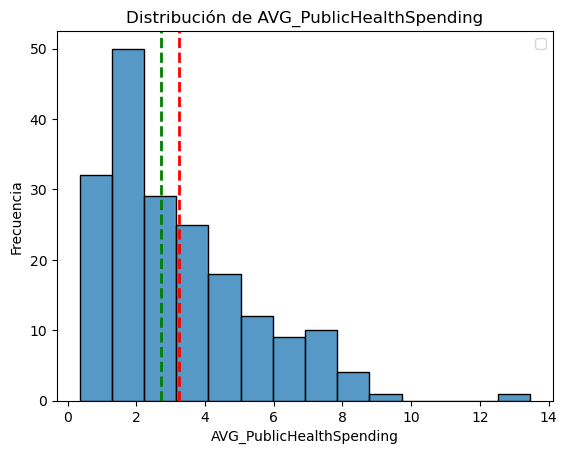

In [33]:
graficar_histplot(df_,"AVG_PublicHealthSpending")

In [34]:
#graficar_boxplot_bivariable_px(df,"Domestic general government health expenditure (% of GDP)","Code")

### Average Public HC Spending evolution

In [35]:
df_ = df.groupby('Year').agg({'Entity': 'nunique', 'Domestic general government health expenditure (% of GDP)': 'mean'}).reset_index()
df_.rename(columns={"Entity": "Num_Countries", "Domestic general government health expenditure (% of GDP)": "AVG_PublicHealthSpending"}, inplace=True)

df_.head(3)

,Year,Num_Countries,AVG_PublicHealthSpending
0,2000,198,3.035865
1,2001,198,3.070843
2,2002,199,3.061708


<Axes: xlabel='Year', ylabel='AVG_PublicHealthSpending'>

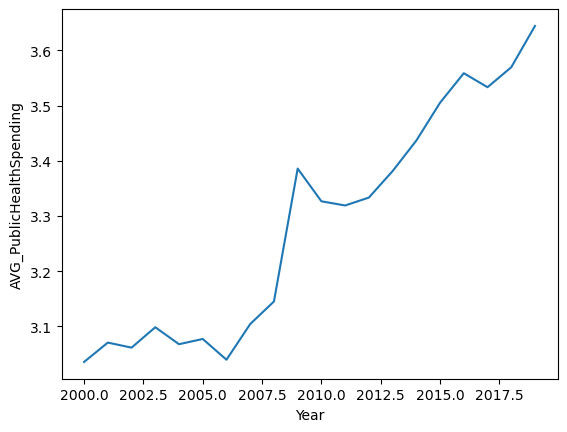

In [36]:
sns.lineplot(data=df_, x="Year", y="AVG_PublicHealthSpending")

## GDP per capita

In [37]:
# Dataset for life_expectancy
df = df_gdp.copy()
print(f'Shape of the dataset: {df.shape}')

print(f'\nNumber of countries in the data: {df["Code"].nunique()}')
print(f'Number of years available in the data: {df["Year"].nunique()}')

display(df.head())

Shape of the dataset: (10108, 4)

Number of countries in the data: 182
Number of years available in the data: 70


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730


In [38]:
df.describe()

,Year,"GDP per capita (output, multiple price benchmarks)"
count,10108.000000,10108.000000
mean,1989.576078,13121.751931
std,18.564530,17131.658623
min,1950.000000,246.741710
25%,1975.000000,2617.814225
50%,1991.000000,6723.897300
75%,2005.000000,16650.070000
max,2019.000000,169200.270000


In [39]:
check_df(df,"")

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 10,108 filas y 4 columnas.

########################################################################################
¿Cuáles son las primeras dos filas del conjunto de datos?


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665



########################################################################################
¿Cuáles son las últimas dos filas del conjunto de datos?


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
10106,Zimbabwe,ZWE,2018,3007.237
10107,Zimbabwe,ZWE,2019,2787.659



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
5319,Lebanon,LBN,1977,5549.2383
9016,Taiwan,TWN,1994,27357.7870



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - Entity
	 - Code
	 - Year
	 - GDP per capita (output, multiple price benchmarks)

########################################################################################
¿Cuál es el tipo de datos de cada columna?
Entity                                                 object
Code                                                   object
Year                                                    int64
GDP per capita (output, multiple price benchmarks)    float64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataF

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
count,10108,10108,10108.0,10108.0
unique,182,182,,
top,Ethiopia,ETH,,
freq,70,70,,
mean,,,1989.576078,13121.751931
std,,,18.56453,17131.658623
min,,,1950.0,246.74171
25%,,,1975.0,2617.814225
50%,,,1991.0,6723.8973
75%,,,2005.0,16650.07



########################################################################################
¿Hay valores nulos en el conjunto de datos?
Entity                                                0
Code                                                  0
Year                                                  0
GDP per capita (output, multiple price benchmarks)    0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
Entity                                                0.0
Code                                                  0.0
Year                                                  0.0
GDP per capita (output, multiple price benchmarks)    0.0
dtype: float64

########################################################################################


### Average GDP per capita per country

In [40]:
df_ = df.groupby('Code').agg({'Entity': 'nunique', 'GDP per capita (output, multiple price benchmarks)': 'mean'}).reset_index()
df_.rename(columns={"Entity": "Num_Countries", "GDP per capita (output, multiple price benchmarks)": "AVG_GDP"}, inplace=True)

df_.head()

,Code,Num_Countries,AVG_GDP
0,ABW,1,35498.419750
1,AGO,1,4492.325232
2,AIA,1,21180.396160
3,ALB,1,5946.504235
4,ARE,1,99107.210529


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


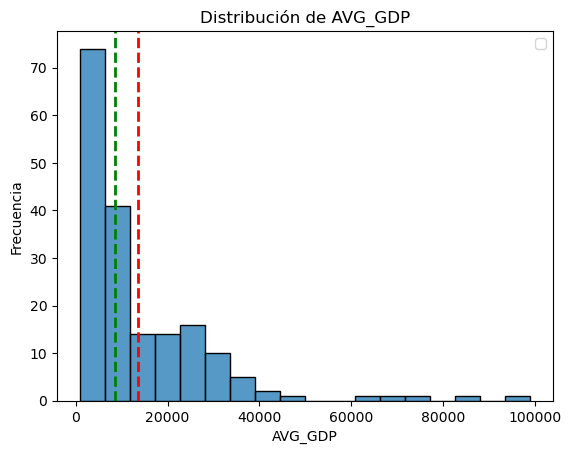

In [41]:
graficar_histplot(df_,"AVG_GDP")

### Average GDP per capita evolution

In [42]:
df_ = df.groupby('Year').agg({'Entity': 'nunique', 'GDP per capita (output, multiple price benchmarks)': 'mean'}).reset_index()
df_.rename(columns={"Entity": "Num_Countries", "GDP per capita (output, multiple price benchmarks)": "AVG_GDP"}, inplace=True)

df_.head(3)

,Year,Num_Countries,AVG_GDP
0,1950,53,5477.212984
1,1951,58,5452.159208
2,1952,59,5467.860432


<Axes: xlabel='Year', ylabel='AVG_GDP'>

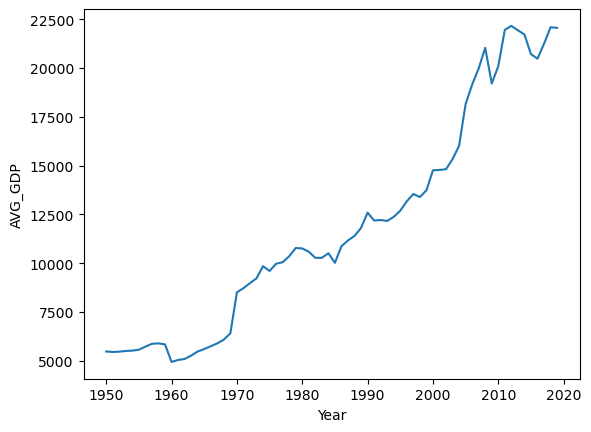

In [43]:
sns.lineplot(data=df_, x="Year", y="AVG_GDP")

## Vaccination

In [44]:
# Dataset for life_expectancy
print(f'Shape of the dataset for life expectancies: {df_life_expec.shape}')
df = df_vaccination.copy()

print(f'\nNumber of countries in the data: {df["Code"].nunique()}')
print(f'Number of years available in the data: {df["Year"].nunique()}')

display(df.head())

Shape of the dataset for life expectancies: (20755, 4)

Number of countries in the data: 196
Number of years available in the data: 42


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


In [45]:
df["AVG_Vaccination"] = df[df.columns.tolist()[3:]].mean(axis=1, skipna= True)

In [46]:
df.describe()

,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),AVG_Vaccination
count,7897.000000,6497.000000,4436.000000,3629.000000,1297.000000,7728.000000,1497.000000,7855.000000,4198.000000,1039.000000,824.000000,7854.000000,7897.000000
mean,2001.586299,84.010312,82.326195,83.148250,82.730146,78.443323,77.035404,80.095226,85.676513,69.495669,54.274272,79.543672,78.278648
std,11.769320,20.009474,21.924247,22.032865,22.685340,21.895398,24.897693,22.114550,21.010275,28.137731,28.903746,22.220256,20.814735
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1992.000000,79.000000,77.000000,80.000000,76.000000,68.000000,69.000000,72.000000,85.000000,58.000000,35.000000,71.000000,68.750000
50%,2002.000000,92.000000,91.000000,92.000000,94.000000,87.000000,87.000000,89.000000,93.000000,80.000000,60.000000,88.000000,85.500000
75%,2012.000000,98.000000,96.000000,96.000000,98.000000,95.000000,94.000000,96.000000,97.000000,90.000000,79.250000,96.000000,94.000000
max,2021.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


### Average Vaccination per country

In [47]:
df_ = df.groupby('Code').agg({'Entity': 'nunique', 'AVG_Vaccination': 'mean'}).reset_index()
df_.rename(columns={"Entity": "Num_Countries", "AVG_Vaccination": "AVG_Vaccination"}, inplace=True)

df_.head()

,Code,Num_Countries,AVG_Vaccination
0,AFG,1,41.177098
1,AGO,1,40.698823
2,ALB,1,95.159307
3,AND,1,94.904286
4,ARE,1,85.105830


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


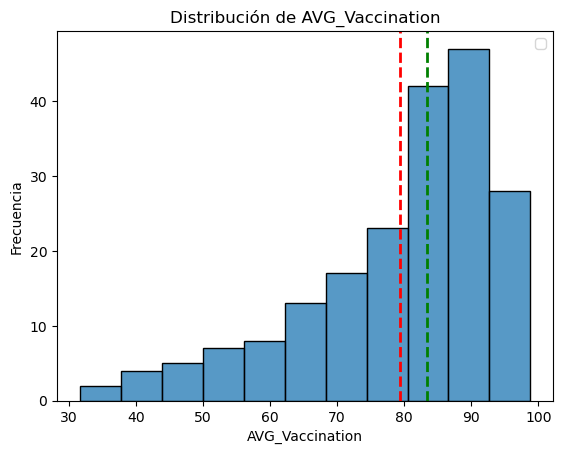

In [48]:
graficar_histplot(df_,"AVG_Vaccination")

### Average Vaccination evolution

In [49]:
df_ = df.groupby('Year').agg({'Entity': 'nunique', 'AVG_Vaccination': 'mean'}).reset_index()
df_.rename(columns={"Entity": "Num_Countries", "AVG_Vaccination": "AVG_Vaccination"}, inplace=True)

df_.head(3)

,Year,Num_Countries,AVG_Vaccination
0,1980,117,46.617949
1,1981,140,46.871190
2,1982,146,50.342694


<Axes: xlabel='Year', ylabel='AVG_Vaccination'>

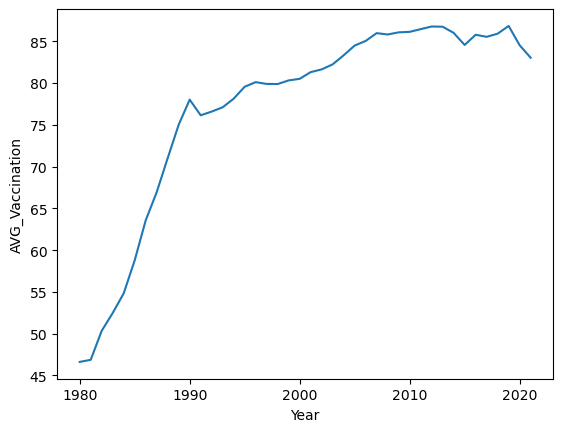

In [50]:
sns.lineplot(data=df_, x="Year", y="AVG_Vaccination")

## Poverty

In [51]:
# Dataset for life_expectancy

df = df_poverty.copy()
print(f'Shape of the dataset: {df.shape}')

print(f'\nNumber of countries in the data: {df["Country"].nunique()}')
print(f'Number of years available in the data: {df["Year"].nunique()}')

display(df.head())

Shape of the dataset: (2602, 109)

Number of countries in the data: 192
Number of years available in the data: 60


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,...,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,...,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
2,Albania,2005,0.000000,0.591086,7.289305,40.428430,68.453090,95.405670,98.85736,99.546940,...,11.115035,13.596755,22.311052,29.289268,46.369564,1.142718,4.662236,3.874336,1.979621,1.957110
3,Albania,2008,0.000000,0.199925,3.902613,33.431850,62.768870,94.582830,98.50923,99.344450,...,11.974607,14.590684,24.551666,29.854542,45.687150,1.114657,4.395911,3.574216,1.957677,1.825743
4,Albania,2012,0.024101,0.620691,4.805442,36.667750,65.062386,95.520160,99.07353,99.742485,...,11.699819,14.170336,21.827140,30.110823,46.954838,1.041193,4.272574,3.630154,1.942752,1.868563


In [52]:
df.describe()

,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2.602000e+03,...,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2596.000000,2597.000000,2596.000000
mean,2005.425826,2.972837,11.584494,22.278238,37.969713,48.225490,66.262738,76.242978,83.259490,9.329914e+06,...,27.523877,34.604034,61.573919,25.285076,45.472209,1.855568,8.069418,6.519033,2.522123,2.433076
std,10.444378,7.028047,18.719191,27.820263,34.788476,36.727799,35.680270,30.484415,24.019419,4.140739e+07,...,24.518757,29.857803,49.205593,5.251544,2.138331,1.113696,5.876644,4.693938,0.928735,0.883159
min,1963.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.723412,5.955263,14.098875,0.000000e+00,...,1.199339,1.412341,2.045702,9.471118,24.919708,0.596408,2.430172,2.286241,1.501557,1.505083
25%,1999.000000,0.029548,0.249047,0.750724,2.510355,5.808275,30.913912,59.992347,77.095327,1.929750e+03,...,8.604123,11.293611,21.263922,22.032179,44.538218,1.146369,4.703693,3.938470,2.018199,1.941470
50%,2007.000000,0.344312,1.771000,8.590034,30.257582,51.135908,83.285630,92.488948,96.008290,6.288900e+04,...,17.225177,22.737409,46.769245,26.322975,45.938516,1.446343,6.081824,5.128627,2.288043,2.209133
75%,2014.000000,1.928456,14.175411,36.920021,69.638908,85.206468,97.219242,99.090163,99.577137,1.034880e+06,...,43.762865,53.509301,90.932207,29.278652,46.773082,2.110838,8.855296,7.445883,2.769466,2.731485
max,2022.000000,67.128730,96.871420,99.999985,99.999985,99.999985,100.000000,100.000000,100.000000,4.782679e+08,...,118.504196,145.312650,264.254100,37.619087,52.087090,8.343586,72.681730,96.666660,11.394558,23.999998


### Nulls (%)

In [53]:
series_nulls = round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False)

series_nulls.to_frame(name="Percentage_nulls").query("Percentage_nulls > 0")

,Percentage_nulls
income_gap_ratio_100,17.52
avg_shortfall_100,17.52
decile1_avg,11.45
decile3_avg,11.45
decile3_share,11.45
decile2_share,11.45
decile1_share,11.45
polarization,11.45
gini,11.45
mld,11.45


# 2. Combinar taules

df_deaths

df_suicides

df_gdp

df_vaccination

df_homicides

df_life_expec

df_poverty

df_public_health_spend

## 2.1. Añadir atributo ID en todas las tablas 

Para identificar cada dato de cada tabla, creamos el atributo ID como la combinación de "Entity" y "Year", ya que las tablas contienen datos por países y año.

Comprovar que efectivamente los distintos ID creados son identificadores primarios (sin valores duplicados).

### Life Expectancy

In [54]:
print(f"#Filas en la tabla: {df_life_expec.shape[0]}")
print(f"#Años distintos: {df_life_expec.Year.nunique()}")
print(f"#Entidades distintas: {df_life_expec.Entity.nunique()}")

df_life_expec.head(3)

#Filas en la tabla: 20755
#Años distintos: 313
#Entidades distintas: 261


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456


In [55]:
print(f"Formato de 'Entity': {df_life_expec.Entity.dtypes}")
print(f"Formato de 'Year': {df_life_expec.Year.dtypes}")

df_life_expec["ID"] = df_life_expec["Entity"] + "_" + df_life_expec["Year"].astype(str)

df_life_expec.head(2)

Formato de 'Entity': object
Formato de 'Year': int64


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,ID
0,Afghanistan,AFG,1950,27.7275,Afghanistan_1950
1,Afghanistan,AFG,1951,27.9634,Afghanistan_1951


In [56]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_life_expec['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


### Deaths

In [57]:
print(f"#Filas en la tabla: {df_deaths.shape[0]}")
print(f"#Años distintos: {df_deaths.Year.nunique()}")
print(f"#Entidades distintas: {df_deaths.Entity.nunique()}")

df_deaths.head(3)

#Filas en la tabla: 6840
#Años distintos: 30
#Entidades distintas: 228


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325


In [58]:
print(f"Formato de 'Entity': {df_deaths.Entity.dtypes}")
print(f"Formato de 'Year': {df_deaths.Year.dtypes}")

df_deaths["ID"] = df_deaths["Entity"] + "_" + df_deaths["Year"].astype(str)

df_deaths.head(2)

Formato de 'Entity': object
Formato de 'Year': int64


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),ID
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,Afghanistan_1990
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,Afghanistan_1991


In [59]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_deaths['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


In [60]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_life_expec['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


### Suicides

In [61]:
print(f"#Filas en la tabla: {df_suicides.shape[0]}")
print(f"#Años distintos: {df_suicides.Year.nunique()}")
print(f"#Entidades distintas: {df_suicides.Entity.nunique()}")

df_suicides.head(3)

#Filas en la tabla: 3880
#Años distintos: 20
#Entidades distintas: 194


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Afghanistan,AFG,2000,7.71
1,Afghanistan,AFG,2001,7.89
2,Afghanistan,AFG,2002,7.85


In [62]:
print(f"Formato de 'Entity': {df_suicides.Entity.dtypes}")
print(f"Formato de 'Year': {df_suicides.Year.dtypes}")

df_suicides["ID"] = df_suicides["Entity"] + "_" + df_suicides["Year"].astype(str)

df_suicides.head(2)

Formato de 'Entity': object
Formato de 'Year': int64


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes,ID
0,Afghanistan,AFG,2000,7.71,Afghanistan_2000
1,Afghanistan,AFG,2001,7.89,Afghanistan_2001


In [63]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_suicides['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


### GDP per capita

In [64]:
print(f"#Filas en la tabla: {df_gdp.shape[0]}")
print(f"#Años distintos: {df_gdp.Year.nunique()}")
print(f"#Entidades distintas: {df_gdp.Entity.nunique()}")

df_gdp.head(3)

#Filas en la tabla: 10108
#Años distintos: 70
#Entidades distintas: 182


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481


In [65]:
print(f"Formato de 'Entity': {df_gdp.Entity.dtypes}")
print(f"Formato de 'Year': {df_gdp.Year.dtypes}")

df_gdp["ID"] = df_gdp["Entity"] + "_" + df_gdp["Year"].astype(str)

df_gdp.head(2)

Formato de 'Entity': object
Formato de 'Year': int64


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",ID
0,Albania,ALB,1971,3159.8088,Albania_1971
1,Albania,ALB,1972,3214.6665,Albania_1972


In [66]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_gdp['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


### Vaccination

In [67]:
print(f"#Filas en la tabla: {df_vaccination.shape[0]}")
print(f"#Años distintos: {df_vaccination.Year.nunique()}")
print(f"#Entidades distintas: {df_vaccination.Entity.nunique()}")

df_vaccination.head(3)

#Filas en la tabla: 7897
#Años distintos: 42
#Entidades distintas: 202


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0


In [68]:
print(f"Formato de 'Entity': {df_vaccination.Entity.dtypes}")
print(f"Formato de 'Year': {df_vaccination.Year.dtypes}")

df_vaccination["ID"] = df_vaccination["Entity"] + "_" + df_vaccination["Year"].astype(str)

df_vaccination.head(2)

Formato de 'Entity': object
Formato de 'Year': int64


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),ID
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0,Afghanistan_1982
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0,Afghanistan_1983


In [69]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_vaccination['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


### Homicides

In [70]:
print(f"#Filas en la tabla: {df_homicides.shape[0]}")
print(f"#Años distintos: {df_homicides.Year.nunique()}")
print(f"#Entidades distintas: {df_homicides.Entity.nunique()}")

df_homicides.head(3)

#Filas en la tabla: 4204
#Años distintos: 32
#Entidades distintas: 209


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668


In [71]:
print(f"Formato de 'Entity': {df_homicides.Entity.dtypes}")
print(f"Formato de 'Year': {df_homicides.Year.dtypes}")

df_homicides["ID"] = df_homicides["Entity"] + "_" + df_homicides["Year"].astype(str)

df_homicides.head(2)

Formato de 'Entity': object
Formato de 'Year': int64


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages",ID
0,Afghanistan,AFG,2009,4.071527,Afghanistan_2009
1,Afghanistan,AFG,2010,3.487093,Afghanistan_2010


In [72]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_homicides['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


### Poverty

In [73]:
print(f"#Filas en la tabla: {df_poverty.shape[0]}")
print(f"#Años distintos: {df_poverty.Year.nunique()}")
print(f"#Entidades distintas: {df_poverty.Country.nunique()}")

df_poverty.head(3)

#Filas en la tabla: 2602
#Años distintos: 60
#Entidades distintas: 192


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.62388,98.702095,99.89742,99.951650,...,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.70505,96.528860,98.94813,99.762024,...,9.717249,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572
2,Albania,2005,0.000000,0.591086,7.289305,40.428430,68.45309,95.405670,98.85736,99.546940,...,11.115035,13.596755,22.311052,29.289268,46.369564,1.142718,4.662236,3.874336,1.979621,1.957110


In [74]:
print(f"Formato de 'Country': {df_poverty.Country.dtypes}")
print(f"Formato de 'Year': {df_poverty.Year.dtypes}")

df_poverty["ID"] = df_poverty["Country"] + "_" + df_poverty["Year"].astype(str)

df_poverty.head(2)

Formato de 'Country': object
Formato de 'Year': int64


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,...,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio,ID
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.62388,98.702095,99.89742,99.951650,...,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647,Albania_1996
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.70505,96.528860,98.94813,99.762024,...,12.101596,20.623796,28.586811,45.977550,1.215056,4.831625,3.995204,2.092198,1.909572,Albania_2002


In [75]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_poverty['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


### Public HC spending

In [76]:
print(f"#Filas en la tabla: {df_public_health_spend.shape[0]}")
print(f"#Años distintos: {df_public_health_spend.Year.nunique()}")
print(f"#Entidades distintas: {df_public_health_spend.Entity.nunique()}")

df_public_health_spend.head(3)

#Filas en la tabla: 4014
#Años distintos: 20
#Entidades distintas: 204


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926


In [77]:
print(f"Formato de 'Entity': {df_public_health_spend.Entity.dtypes}")
print(f"Formato de 'Year': {df_public_health_spend.Year.dtypes}")

df_public_health_spend["ID"] = df_public_health_spend["Entity"] + "_" + df_public_health_spend["Year"].astype(str)

df_public_health_spend.head(2)

Formato de 'Entity': object
Formato de 'Year': int64


,Entity,Code,Year,Domestic general government health expenditure (% of GDP),ID
0,Afghanistan,AFG,2002,0.084181,Afghanistan_2002
1,Afghanistan,AFG,2003,0.650963,Afghanistan_2003


In [78]:
print(f"Confirmar que el atributo ID es una primary key:")
print(f"#Duplicados en 'ID': {df_public_health_spend['ID'].duplicated().sum()}")

Confirmar que el atributo ID es una primary key:
#Duplicados en 'ID': 0


## 2.2. Combinar tablas

Utilizamos "Right_Join" respecto la tabla "Life Expectancy" mediante los atributos ID de les distintas tablas para unir toda la información disponible a la tabla de esperanzas de vida.

In [79]:
# Filtrar atributos a unir de cada tabla:

df1 = df_life_expec.loc[:, ~df_life_expec.columns.isin(["Code"])]
df2 = df_deaths.loc[:, ~df_deaths.columns.isin(["Year", "Entity", "Code"])]
df3 = df_suicides.loc[:, ~df_suicides.columns.isin(["Year", "Entity", "Code"])]
df4 = df_gdp.loc[:, ~df_gdp.columns.isin(["Year", "Entity", "Code"])]
df5 = df_vaccination.loc[:, ~df_vaccination.columns.isin(["Year", "Entity", "Code"])]
df6 = df_homicides.loc[:, ~df_homicides.columns.isin(["Year", "Entity", "Code"])]
df7 = df_poverty.loc[:, ~df_poverty.columns.isin(["Year", "Country"])]
df8 = df_public_health_spend.loc[:, ~df_public_health_spend.columns.isin(["Year", "Entity", "Code"])]

In [80]:
print(f"#Filas Life Expectancy: {df1.shape[0]}")
print(f"#Filas Deaths: {df2.shape[0]}")
print(f"#Filas Suicides: {df3.shape[0]}")
print(f"#Filas GDP: {df4.shape[0]}")
print(f"#Filas Vaccination: {df5.shape[0]}")
print(f"#Filas Homicides: {df6.shape[0]}")
print(f"#Filas Povery: {df7.shape[0]}")
print(f"#Filas Public HC spend: {df8.shape[0]}")

#Filas Life Expectancy: 20755
#Filas Deaths: 6840
#Filas Suicides: 3880
#Filas GDP: 10108
#Filas Vaccination: 7897
#Filas Homicides: 4204
#Filas Povery: 2602
#Filas Public HC spend: 4014


In [81]:
df = pd.merge(df1, df2, on='ID', how='left')
df = pd.merge(df, df3, on='ID', how='left')
df = pd.merge(df, df4, on='ID', how='left')
df = pd.merge(df, df5, on='ID', how='left')
df = pd.merge(df, df6, on='ID', how='left')
df = pd.merge(df, df7, on='ID', how='left')
df = pd.merge(df, df8, on='ID', how='left')

df = df.rename(columns={'Period life expectancy at birth - Sex: all - Age: 0': 'LifeExpectancy'})


In [82]:
print(f"#Filas df final: {df.shape[0]}")
print(f"#Atributos df final: {df.shape[1]}")

df.head(3)

#Filas df final: 20755
#Atributos df final: 157


,Entity,Year,LifeExpectancy,ID,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),...,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio,Domestic general government health expenditure (% of GDP)
0,Afghanistan,1950,27.7275,Afghanistan_1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1951,27.9634,Afghanistan_1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1952,28.4456,Afghanistan_1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.Entity.nunique()

261

In [84]:
columns = df.columns.tolist()
columns

['Entity',
 'Year',
 'LifeExpectancy',
 'ID',
 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
 "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
 "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)",
 'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
 'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
 'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
 'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
 'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
 'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
 'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
 'Deaths - Neonatal disorders - Sex: Both - Age: All Ag

## 2.3. Agrupar países per region

Haciendo uso de la tabla creada "Regions_x_country", podemos vincular cada país a una región geográfica distinta.

In [85]:
df_regions_x_country = pd.read_excel("D:/Documents/1. Academic studies/NuclioSchool/Proyecto Final/data/Regions_x_country.xlsx")

df_regions_x_country.head()

,Pais,Region
0,Cote d'Ivoire,Africa
1,Afghanistan,Asia
2,Africa,Africa
3,Albania,Europe
4,Algeria,Africa


In [86]:
df_regions_x_country.groupby("Region")["Pais"].count()

Region
Africa           59
Asia             52
Europe           54
North America    42
Oceania          24
Other            14
South America    16
Name: Pais, dtype: int64

In [87]:
# Merge the regions table with the original df.
df = pd.merge(df, df_regions_x_country, left_on='Entity', right_on= "Pais", how='left')
df.drop(columns=["Pais"], inplace=True)

df.head(2)

,Entity,Year,LifeExpectancy,ID,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),...,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio,Domestic general government health expenditure (% of GDP),Region
0,Afghanistan,1950,27.7275,Afghanistan_1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,1951,27.9634,Afghanistan_1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [88]:
# Comprovamos que no tengamos nulos en el nuevo atributo "Region".
print("\n Paises en los que no se encuentra region:", "\n", df[df["Region"].isna()].Entity.unique())

print(f"\n Regiones: \n {df.Region.unique()}")


 Paises en los que no se encuentra region: 
 []

 Regiones: 
 ['Asia' 'Africa' 'Europe' 'Oceania' 'South America' 'North America'
 'Other']


In [89]:
df[df["Region"]=="Other"].Entity.unique()

array(['High-income countries', 'Land-locked Developing Countries (LLDC)',
       'Least developed countries', 'Less developed regions',
       'Less developed regions, excluding China',
       'Less developed regions, excluding least developed countries',
       'Low-income countries', 'Lower-middle-income countries',
       'Middle-income countries', 'More developed regions',
       'No income group available',
       'Small Island Developing States (SIDS)',
       'Upper-middle-income countries', 'World'], dtype=object)

## 2.4. Filtrar por año y region

Eliminar datos con año <1990. La cantidad de nulos no permite tomar conclusiones de los datos.

Eliminar datos con Region = "Others". La cantidad de nulos no permite tomar conclusiones de los datos.

In [91]:
df_original = df.copy()

df= df[df['Year'] >= 1990]
df= df[df['Region'] != "Other"]

In [92]:
df.head()

,Entity,Year,LifeExpectancy,ID,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),...,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio,Domestic general government health expenditure (% of GDP),Region
40,Afghanistan,1990,45.9672,Afghanistan_1990,2159.0,1116.0,371.0,2087.0,93.0,1370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
41,Afghanistan,1991,46.6631,Afghanistan_1991,2218.0,1136.0,374.0,2153.0,189.0,1391.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
42,Afghanistan,1992,47.5955,Afghanistan_1992,2475.0,1162.0,378.0,2441.0,239.0,1514.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
43,Afghanistan,1993,51.4664,Afghanistan_1993,2812.0,1187.0,384.0,2837.0,108.0,1687.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
44,Afghanistan,1994,51.4945,Afghanistan_1994,3027.0,1211.0,391.0,3081.0,211.0,1809.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [93]:
df.Region.unique()

array(['Asia', 'Africa', 'Europe', 'Oceania', 'South America',
       'North America'], dtype=object)

## 2.5. Government HC Expenditure (€)

Calculamos la "HC Expenditure per capita" como el producto de la "GDP per capita" y la "HC Expenditure (% GDP)".

In [94]:
df.head()

,Entity,Year,LifeExpectancy,ID,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),...,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio,Domestic general government health expenditure (% of GDP),Region
40,Afghanistan,1990,45.9672,Afghanistan_1990,2159.0,1116.0,371.0,2087.0,93.0,1370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
41,Afghanistan,1991,46.6631,Afghanistan_1991,2218.0,1136.0,374.0,2153.0,189.0,1391.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
42,Afghanistan,1992,47.5955,Afghanistan_1992,2475.0,1162.0,378.0,2441.0,239.0,1514.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
43,Afghanistan,1993,51.4664,Afghanistan_1993,2812.0,1187.0,384.0,2837.0,108.0,1687.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
44,Afghanistan,1994,51.4945,Afghanistan_1994,3027.0,1211.0,391.0,3081.0,211.0,1809.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [95]:
df["HC Expenditure (€/person)"]= df['GDP per capita (output, multiple price benchmarks)'] * df['Domestic general government health expenditure (% of GDP)'] / 100

df_healthcare_expenditure = df.loc[:, ["Entity", "HC Expenditure (€/person)", 'GDP per capita (output, multiple price benchmarks)', 'Domestic general government health expenditure (% of GDP)']]
df_healthcare_expenditure.describe()

,HC Expenditure (€/person),"GDP per capita (output, multiple price benchmarks)",Domestic general government health expenditure (% of GDP)
count,3341.000000,5336.000000,3734.000000
mean,768.360719,17238.300478,3.238193
std,1100.919328,19839.064492,2.302491
min,0.337945,246.741710,0.062046
25%,54.965214,3463.272125,1.521404
50%,292.386681,9901.194500,2.647069
75%,911.846796,24908.802500,4.456869
max,7041.746919,169200.270000,24.113354


## 2.6. Descargar datos para el dashboard

In [96]:
columns_corr50 = ["Entity",
"ID",
"LifeExpectancy",
"Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)", 
"Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)", 
'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)', 
'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)', 
'Number below $40 a day', 
'Number below $30 a day', 
'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)', 
'decile7_avg', 
'decile6_thr', 
'decile6_avg', 
'decile8_avg', 
'decile5_avg', 
'decile4_avg', 
'decile7_thr', 
'decile5_thr', 
'decile4_thr', 
'Median income or consumption per day', 
'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)', 
'decile9_avg', 
'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)', 
'decile3_avg', 
'decile8_thr', 
'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)', 
'GDP per capita (output, multiple price benchmarks)', 
'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)', 
'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)', 
'decile3_thr', 
'Number below $20 a day', 
'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)', 
'poverty_gap_index_4000', 
'poverty_gap_index_3000', 
'Mean income or consumption per day', 
'decile2_thr', 
'Threshold income or consumption per day marking the richest decile', 
'total_shortfall_3000', 
'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)', 
'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)', 
'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)', 
'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)', 
'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)', 
'decile2_avg', 
'total_shortfall_4000', 
'poverty_gap_index_2000', 
'avg_shortfall_60_median', 
'Number below $10 a day', 
'Threshold income or consumption per day marking the poorest decile', 
'total_shortfall_60_median', 
'income_gap_ratio_3000', 
'avg_shortfall_3000', 
'HC Expenditure (€/person)', 
'Domestic general government health expenditure (% of GDP)']

In [97]:
df_to_melt = df.loc[:,columns_corr50]

df_to_melt_columns = df_to_melt.columns.tolist()

df_melted= df_to_melt.melt(
    id_vars=[df_to_melt_columns[0],df_to_melt_columns[1],df_to_melt_columns[2]], value_vars=df_to_melt_columns[3:],
    var_name='Attribute', value_name='Value', ignore_index=False)

df_melted["Entity-Attribute"] = df_melted['Entity'] + '-' + df_melted['Attribute']
df_melted.drop(['Entity'], axis=1, inplace=True)

df_melted.head()

,ID,LifeExpectancy,Attribute,Value,Entity-Attribute
40,Afghanistan_1990,45.9672,Deaths - Alzheimer's disease and other dementi...,1116.0,Afghanistan-Deaths - Alzheimer's disease and o...
41,Afghanistan_1991,46.6631,Deaths - Alzheimer's disease and other dementi...,1136.0,Afghanistan-Deaths - Alzheimer's disease and o...
42,Afghanistan_1992,47.5955,Deaths - Alzheimer's disease and other dementi...,1162.0,Afghanistan-Deaths - Alzheimer's disease and o...
43,Afghanistan_1993,51.4664,Deaths - Alzheimer's disease and other dementi...,1187.0,Afghanistan-Deaths - Alzheimer's disease and o...
44,Afghanistan_1994,51.4945,Deaths - Alzheimer's disease and other dementi...,1211.0,Afghanistan-Deaths - Alzheimer's disease and o...


In [98]:
df_melted.shape

(396576, 5)

In [99]:
df_ID = pd.DataFrame(df["ID"])
df_ID[['Entity', 'Year']] = df_ID['ID'].str.split('_', expand=True)
df_ID.drop_duplicates(inplace=True)

df_ID.head()

,ID,Entity,Year
40,Afghanistan_1990,Afghanistan,1990
41,Afghanistan_1991,Afghanistan,1991
42,Afghanistan_1992,Afghanistan,1992
43,Afghanistan_1993,Afghanistan,1993
44,Afghanistan_1994,Afghanistan,1994


In [100]:
df_ID.shape

(7776, 3)

In [101]:
#df_melted.to_excel(r"D:\Documents\1. Academic studies\NuclioSchool\Proyecto Final\data\df_ALLdata_melted.xlsx", index=False)
#df_ID.to_csv(r"D:\Documents\1. Academic studies\NuclioSchool\Proyecto Final\data\df_ALLdata_ID.xlsx", index=False)
#df.to_csv(r"D:\Documents\1. Academic studies\NuclioSchool\Proyecto Final\data\df_ALLdata_filtered.xlsx", index=False)

# 3. Análisis

## 3.1. Nulls

### Percentages

Tabla de porcentages de nulos por variable.

In [102]:
df_nulls = pd.DataFrame(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False), columns=["%NULLs"])

In [103]:
pd.set_option('display.max_rows', None)  # None muestra todas las filas

print(df_nulls)

pd.reset_option('display.max_rows')

                                                    %NULLs
YFV (% of one-year-olds immunized)                   90.69
RotaC (% of one-year-olds immunized)                 88.08
IPV1 (% of one-year-olds immunized)                  83.95
PCV3 (% of one-year-olds immunized)                  82.01
avg_shortfall_100                                    80.22
income_gap_ratio_100                                 80.22
avg_shortfall_215                                    77.01
income_gap_ratio_215                                 77.01
avg_shortfall_365                                    75.80
income_gap_ratio_365                                 75.80
avg_shortfall_685                                    75.24
income_gap_ratio_685                                 75.24
avg_shortfall_1000                                   75.19
income_gap_ratio_1000                                75.19
decile6_thr                                          75.13
Threshold income or consumption per day marking...   75.

In [104]:
#df_nulls.to_excel("Nulls_table_after.xlsx")

### Evolution

Graficamos la cantidad de nulos por año para analizar y acotar el posterior análisis a periodos en los que tengamos suficientes datos

In [105]:
pd.set_option('display.max_rows', None)  # None muestra todas las filas

print(df.iloc[1])

pd.reset_option('display.max_rows')

Entity                                                                                           Afghanistan
Year                                                                                                    1991
LifeExpectancy                                                                                       46.6631
ID                                                                                          Afghanistan_1991
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                              2218.0
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)                 1136.0
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)                                      374.0
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)                                2153.0
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                                  189.0
Deaths - Drowning -

Contamos para cada registro la cantidad de valores nulos y no nulos. Esto corresponde a los nulos por país y año.

In [106]:
df_nulls_evolution = df.copy()

# Contar valores True y False por fila
true_counts = df_nulls_evolution.iloc[:,4:].isnull().sum(axis=1)  # Suma de True por fila (True se cuenta como 1)
false_counts = df_nulls_evolution.shape[1] - true_counts - 4 # Total de columnas menos la suma de Tru y la 4 columnas ID

# Concatenar con los ID
df_nulls_evolution = pd.concat([df_nulls_evolution.iloc[:,:4], true_counts, false_counts], axis=1)
df_nulls_evolution.rename(columns={0: "Nulls", 1: "Not nulls"}, inplace=True)

# Añadir la región de cada país
df_nulls_evolution = pd.merge(df_nulls_evolution, df_regions_x_country, left_on='Entity', right_on= "Pais", how='left')


df_nulls_evolution.head()

,Entity,Year,LifeExpectancy,ID,Nulls,Not nulls,Pais,Region
0,Afghanistan,1990,45.9672,Afghanistan_1990,119,36,Afghanistan,Asia
1,Afghanistan,1991,46.6631,Afghanistan_1991,119,36,Afghanistan,Asia
2,Afghanistan,1992,47.5955,Afghanistan_1992,119,36,Afghanistan,Asia
3,Afghanistan,1993,51.4664,Afghanistan_1993,119,36,Afghanistan,Asia
4,Afghanistan,1994,51.4945,Afghanistan_1994,119,36,Afghanistan,Asia


#### Grafico

Graficamos tanto la cantidad de nulos por región y año como la cantidad de nulos por país de cada región y año.

Es importante diferenciar '#Nulls' de 'Media de Nulos' ya que cuantos más registros de años tenemos, más posibilidad de tener nulos.

In [107]:
df_figure = df_nulls_evolution.copy()

df_figure = df_figure.groupby(["Year","Region"]).agg({"Nulls": "sum", "Not nulls": "sum", "Entity": "nunique"}).sort_values(by=["Year", "Region"]).reset_index()
df_figure["Nulls/Entity"] = df_figure.Nulls / df_figure.Entity

df_figure.head(5)

,Year,Region,Nulls,Not nulls,Entity,Nulls/Entity
0,1990,Africa,6837,2308,59,115.881356
1,1990,Asia,5506,2399,51,107.960784
2,1990,Europe,5815,2090,51,114.019608
3,1990,North America,4953,1557,42,117.928571
4,1990,Oceania,3000,720,24,125.000000


In [108]:
# Crear gráfico de líneas
fig = px.line(df_figure, x='Year', y='Nulls', color='Region', markers=True, title='#NULLs por año y región')

fig.show()

In [109]:
# Crear gráfico de líneas
fig = px.line(df_figure, x='Year', y='Nulls/Entity', color='Region', markers=True, title='Media de valores nulos por año y región')
fig.update_layout(yaxis_title='Media de nulos por región')

# Añadir linea indicando el máximo de valores nulos
fig.add_trace(go.Scatter(x=[df['Year'].min(), df['Year'].max()], y=[153, 153],
                         mode='lines',
                         line=dict(color='black', dash='dash'),
                         name='All NULLs',
                         showlegend=True  # Mostrar en la leyenda
                         ))

# Mostrar grafico
fig.show()

In [110]:
df_figure[(df_figure['Year'] == 2020) | (df_figure['Year'] == 2021)].sort_values(["Region", "Year"])

,Year,Region,Nulls,Not nulls,Entity,Nulls/Entity
180,2020,Africa,8332,813,59,141.220339
186,2021,Africa,8338,807,59,141.322034
181,2020,Asia,6447,1458,51,126.411765
187,2021,Asia,6767,1138,51,132.686275
182,2020,Europe,4365,3540,51,85.588235
188,2021,Europe,7344,561,51,144.000000
183,2020,North America,5811,699,42,138.357143
189,2021,North America,5705,805,42,135.833333
184,2020,Oceania,3549,171,24,147.875000
190,2021,Oceania,3543,177,24,147.625000


### Imputacion de nulos

Analizamos para la variables "GDP per capita (output, multiple price benchmarks)" que tipo de imputación es mejor: media, mediana, aleatorio.

In [111]:
df_imputacion = df.copy()

In [112]:
variable_interes = "GDP per capita (output, multiple price benchmarks)"

In [113]:
df_imputacion_ = df_imputacion[["Entity", "Region", variable_interes]]
df_imputacion_.head()

,Entity,Region,"GDP per capita (output, multiple price benchmarks)"
40,Afghanistan,Asia,NaN
41,Afghanistan,Asia,NaN
42,Afghanistan,Asia,NaN
43,Afghanistan,Asia,NaN
44,Afghanistan,Asia,NaN


In [114]:
media = df_imputacion_[variable_interes].mean()
mediana = df_imputacion_[variable_interes].median()
valor_aleatorio = np.random.choice(df_imputacion_[variable_interes].dropna().values)

df_imputacion_[variable_interes].describe()

count      5336.000000
mean      17238.300478
std       19839.064492
min         246.741710
25%        3463.272125
50%        9901.194500
75%       24908.802500
max      169200.270000
Name: GDP per capita (output, multiple price benchmarks), dtype: float64

In [115]:
df_imputacion_['GDP_media']= df_imputacion_[variable_interes].fillna(media)
df_imputacion_['GDP_mediana'] = df_imputacion_[variable_interes].fillna(mediana)
df_imputacion_['GDP_random'] = df_imputacion_[variable_interes].apply(lambda x: valor_aleatorio if pd.isna(x) else x)

df_imputacion_.sample(n=5)

,Entity,Region,"GDP per capita (output, multiple price benchmarks)",GDP_media,GDP_mediana,GDP_random
12023,Micronesia (country),Oceania,NaN,17238.300478,9901.1945,11015.1190
19054,Turkmenistan,Asia,22386.3830,22386.383000,22386.3830,22386.3830
1492,Bangladesh,Asia,1535.8394,1535.839400,1535.8394,1535.8394
18961,Turkey,Europe,13296.9110,13296.911000,13296.9110,13296.9110
15849,Saint Martin (French part),North America,NaN,17238.300478,9901.1945,11015.1190


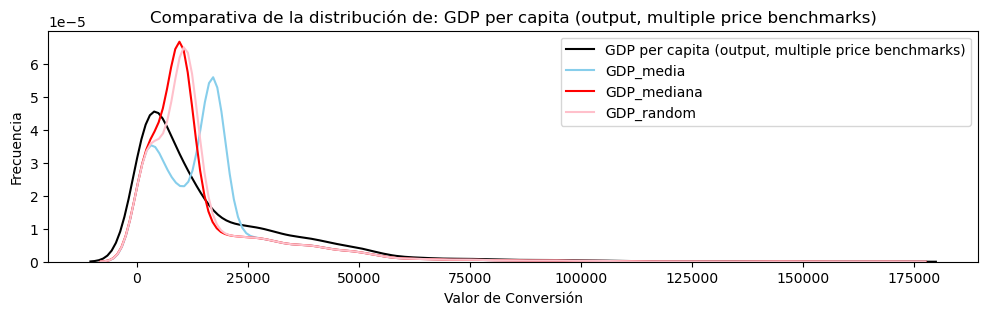

In [116]:
variables_imputacion = [variable_interes,
                        'GDP_media',
                        'GDP_mediana',
                        'GDP_random']

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 3))

colores = ['black', 'skyblue', 'red', 'pink']

for i, var in enumerate(variables_imputacion):
  sns.kdeplot(
      data=df_imputacion_,
      x=var,
      color=colores[i],
      label=var,
      ax=ax
  )

  # Añadir una leyenda para identificar las distribuciones y medias
  ax.legend()

  # Añadir título y etiquetas a los ejes
  ax.set_title(f'Comparativa de la distribución de: {variable_interes}')
  ax.set_xlabel('Valor de Conversión')
  ax.set_ylabel('Frecuencia')

plt.show()

Ninguna de las tres tiene una distribución similar a la original, por lo que hacemos el analisis imputando por los mismos valores en función del país del que se tiene el nulo.


Paises con mayores nulos en la variables de interés:

In [117]:
null_counts = df_imputacion_.groupby('Entity')[variable_interes].apply(lambda x: x.isnull().sum()).reset_index().sort_values(by=variable_interes, ascending=False)

null_counts.head()

,Entity,"GDP per capita (output, multiple price benchmarks)"
0,Afghanistan,32
188,Saint Pierre and Miquelon,32
89,Guam,32
88,Guadeloupe,32
86,Greenland,32


Distribucion de % nulos

In [118]:
null_counts.groupby(variable_interes).count()

,Entity
"GDP per capita (output, multiple price benchmarks)",
2,162
3,3
4,3
5,3
7,2
8,1
10,2
11,3
17,2


Como tenemos 32 años de análisis, significa que para 61 paises no tenemos ningún valor de GDP, ya que todos son nulos.

#### Imputar por valores media, mediana, aleatorio por pais:

In [119]:
def distribucion_imputacion_nulos_pais(df_imputacion, variable_interes):
    # Objectivo de la funcion: graficar la distribucion de la variable de correlacion imputando los valores nulos por la
    # media, mediana, o un valor aleatorio, en función del país del que se tiene el nulo.
    # Explicación de variables de entrada de la función:
        # df: 'data frame' del cual leer los nombres de los atributos. No requiere tratamiento previo
        # variable_interes: variable de la cual se quiere estudiar la imputacion de sus nulos
    
    # Datos originales
    df_imputacion_ = df_imputacion[["Entity", variable_interes]]
    paises = df_imputacion_.Entity.unique().tolist()
    df_imputado = pd.DataFrame()

    # Loop por pais
    for pais in paises:
        df_imputacion_pais = df_imputacion_[df_imputacion_["Entity"] == pais]
        
        media = df_imputacion_pais[variable_interes].mean()
        mediana = df_imputacion_pais[variable_interes].median()
        #valor_aleatorio = np.random.choice(df_imputacion_pais[variable_interes].dropna().values)
        
        df_imputacion_pais['Media']= df_imputacion_pais[variable_interes].fillna(media)
        df_imputacion_pais['Mediana'] = df_imputacion_pais[variable_interes].fillna(mediana)
        #df_imputacion_pais['Random'] = df_imputacion_pais[variable_interes].apply(lambda x: valor_aleatorio if pd.isna(x) else x)

        df_imputado = pd.concat([df_imputado, df_imputacion_pais], ignore_index=True)

    # Grafica
    variables_imputacion = [variable_interes,
                        'Media',
                        'Mediana']

    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(12, 3))

    colores = ['black', 'skyblue', 'red']

    for i, var in enumerate(variables_imputacion):
        sns.kdeplot(
            data=df_imputado,
            x=var,
            color=colores[i],
            label=var,
            ax=ax
        )

        # Añadir una leyenda para identificar las distribuciones y medias
        ax.legend()

        # Añadir título y etiquetas a los ejes
        ax.set_title(f'Comparativa de la distribución por país de: {variable_interes}')
        ax.set_xlabel('Valor de Conversión')
        ax.set_ylabel('Frecuencia')

    plt.show()


In [151]:
def distribucion_imputacion_nulos_region(df_imputacion, variable_interes):
    # Objectivo de la funcion: graficar la distribucion de la variable de correlacion imputando los valores nulos por la
    # media, mediana, o un valor aleatorio, en función del país del que se tiene el nulo.
    # Explicación de variables de entrada de la función:
        # df: 'data frame' del cual leer los nombres de los atributos. No requiere tratamiento previo
        # variable_interes: variable de la cual se quiere estudiar la imputacion de sus nulos
    
    # Datos originales
    df_imputacion_ = df_imputacion[["Region", variable_interes]]
    regiones = df_imputacion_.Region.unique().tolist()
    df_imputado = pd.DataFrame()

    # Loop por pais
    for region in regiones:
        df_imputacion_pais = df_imputacion_[df_imputacion_["Region"] == region]
        
        media = df_imputacion_pais[variable_interes].mean()
        mediana = df_imputacion_pais[variable_interes].median()
        valor_aleatorio = np.random.choice(df_imputacion_pais[variable_interes].dropna().values)
        
        df_imputacion_pais['Media']= df_imputacion_pais[variable_interes].fillna(media)
        df_imputacion_pais['Mediana'] = df_imputacion_pais[variable_interes].fillna(mediana)
        df_imputacion_pais['Random'] = df_imputacion_pais[variable_interes].apply(lambda x: valor_aleatorio if pd.isna(x) else x)

        df_imputado = pd.concat([df_imputado, df_imputacion_pais], ignore_index=True)

    # Grafica
    variables_imputacion = [variable_interes,
                        'Media',
                        'Mediana',
                        'Random']

    # Crear una figura y un eje
    fig, ax = plt.subplots(figsize=(12, 3))

    colores = ['black', 'skyblue', 'red', 'pink']

    for i, var in enumerate(variables_imputacion):
        sns.kdeplot(
            data=df_imputado,
            x=var,
            color=colores[i],
            label=var,
            ax=ax
        )

        # Añadir una leyenda para identificar las distribuciones y medias
        ax.legend()

        # Añadir título y etiquetas a los ejes
        ax.set_title(f'Comparativa de la distribución por región de: {variable_interes}')
        ax.set_xlabel('Valor de Conversión')
        ax.set_ylabel('Frecuencia')

    plt.show()


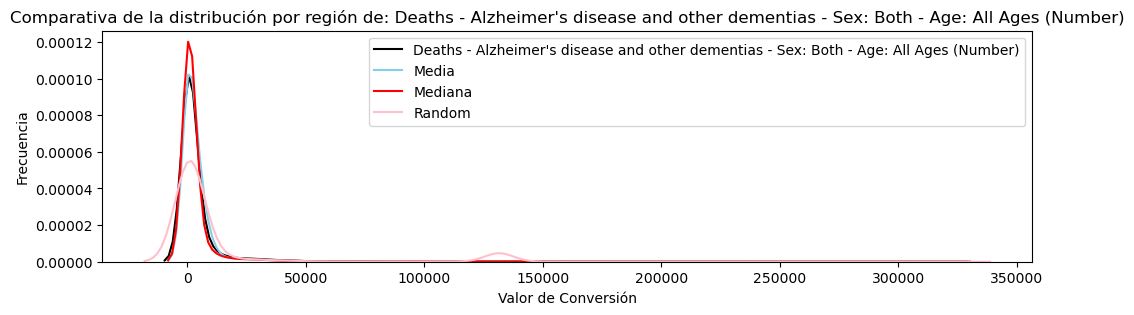

In [121]:
variable =  "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)"
# "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)"
# "GDP per capita (output, multiple price benchmarks)"

distribucion_imputacion_nulos_region(df_imputacion, variable)

In [122]:
null_counts = df_imputacion[["Entity", variable]]
null_counts = null_counts.groupby('Entity')[variable].apply(lambda x: x.isnull().sum()).reset_index().sort_values(by=variable, ascending=False)
null_counts = null_counts.groupby(variable).count()

null_counts["Nulos_%"] = null_counts.index / 32 * 100
null_counts = null_counts[["Nulos_%","Entity"]]

null_counts

,Nulos_%,Entity
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),,
2,6.25,204
32,100.00,39


## 3.2. Variables de interés

DataFrame principales:

* df_corr

* df_corr_interest

### Tabla de correlacion

Análisis multivariable de var. numériques mediante la correlación de Spearman.

In [123]:
variables = df.columns.tolist()

variables_to_remove= ["Entity", "Year", "ID", "Pais", "Region"]

variables = [item for item in variables if item not in variables_to_remove]
variables

['LifeExpectancy',
 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
 "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
 "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)",
 'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
 'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
 'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
 'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
 'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
 'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
 'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
 'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Al

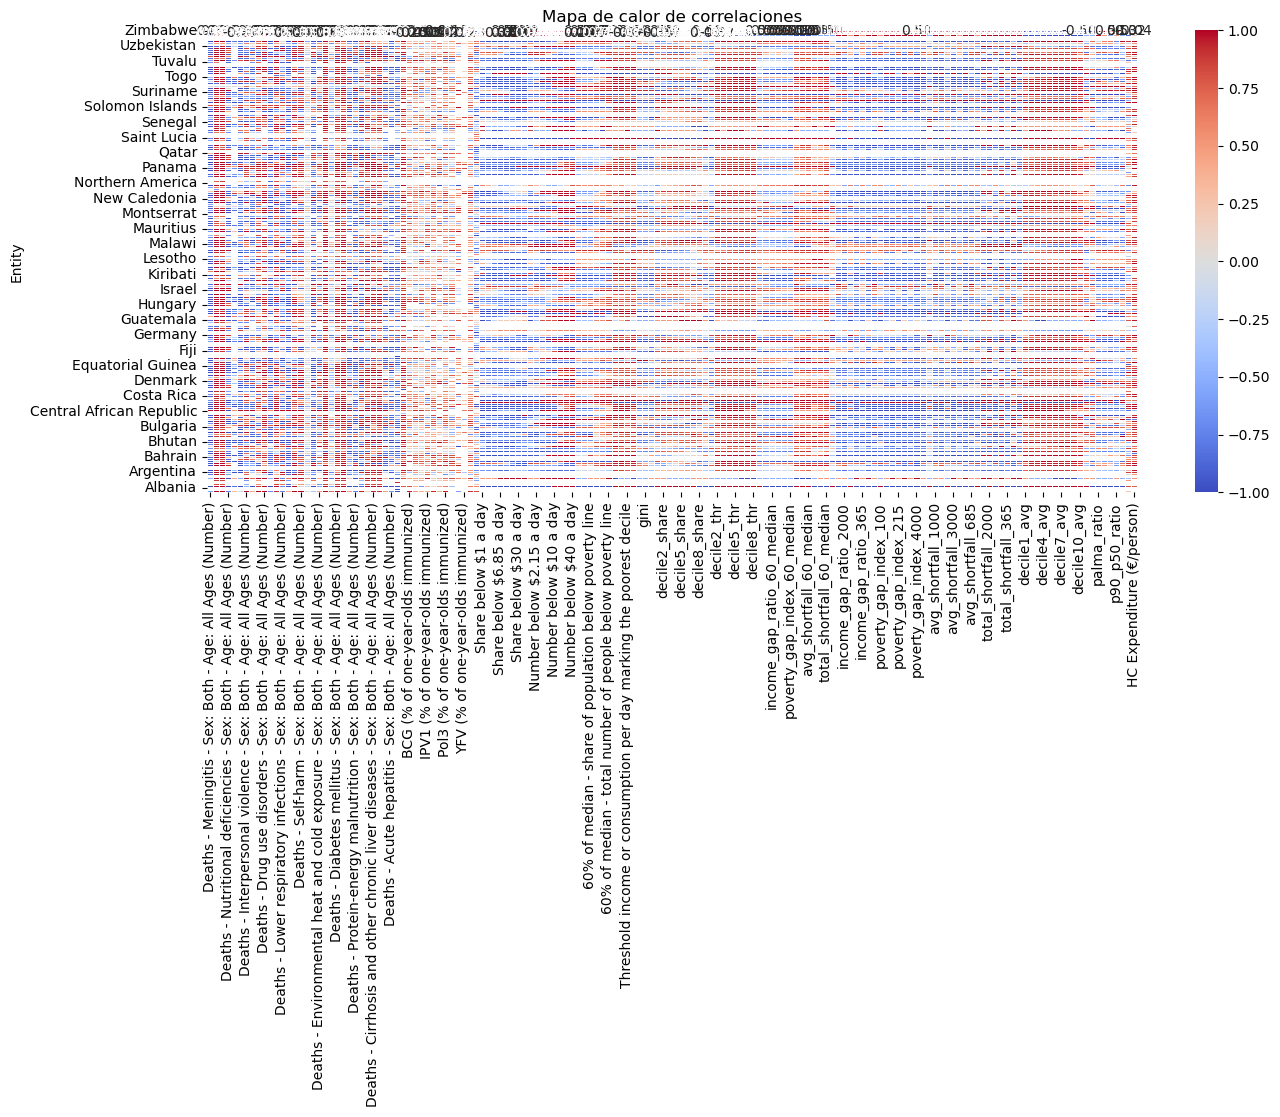

In [124]:
variables_x = ["LifeExpectancy",
           "GDP per capita (output, multiple price benchmarks)",
           #"Year",
           #"Age-standardized suicide rate - Sex: both sexes",
           #"Homicide rate per 100,000 population - Both sexes - All ages",
           "HC Expenditure (€/person)",
           "Domestic general government health expenditure (% of GDP)"
            ] # Numericas (ha d'apareixer LifeExpectancy)

variables_x = variables # Si queremos filtrar por una variables concretas, borrar esta linea i quedar-se con el anterior 'variables_x'.
variable_y = "Entity" #Categorica: escoger si graficar por 'Entity' o 'Region'.

df_corr = (
    df#[df["Region"]=="Europe"]
    .groupby(variable_y)
    [variables_x]
    .corr(method="spearman")
    .reset_index(names=[variable_y, "feature"])
    .query("feature == 'LifeExpectancy'")
    .drop(columns=["LifeExpectancy", "feature"])
    .sort_values(variable_y, ascending=False)
).reset_index(drop= True)

plt.figure(figsize=(15, 6))
sns.heatmap(df_corr.set_index(variable_y), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de correlaciones')
plt.show()

### Agrupar variables de interés por grupos

In [125]:
df_attributes_groups = pd.read_excel("D:/Documents/1. Academic studies/NuclioSchool/Proyecto Final/data/Attribute_groups.xlsx", sheet_name="Sheet1")

df_attributes_groups.query("Atributos_grupo == 'Deaths'")

,Atributos,Atributos_grupo
5,Deaths - Meningitis - Sex: Both - Age: All Age...,Deaths
6,Deaths - Alzheimer's disease and other dementi...,Deaths
7,Deaths - Parkinson's disease - Sex: Both - Age...,Deaths
8,Deaths - Nutritional deficiencies - Sex: Both ...,Deaths
9,Deaths - Malaria - Sex: Both - Age: All Ages (...,Deaths
10,Deaths - Drowning - Sex: Both - Age: All Ages ...,Deaths
11,Deaths - Interpersonal violence - Sex: Both - ...,Deaths
12,Deaths - Maternal disorders - Sex: Both - Age:...,Deaths
13,Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...,Deaths
14,Deaths - Drug use disorders - Sex: Both - Age:...,Deaths


In [126]:
df_attributes_groups.Atributos_grupo.unique()

array(['Categorical', 'Deaths', 'Economic', 'Vaccionation', 'Consumption',
       'Income'], dtype=object)

### Variables interés

En la variable 'df_corr' tenemos guardados las correlaciones para todaos los países y variables con la esperanza de vida.

In [127]:
pd.set_option('display.max_rows', None)  # None muestra todas las filas
pd.set_option('display.max_columns', None)  # None muestra todas las columnas

In [128]:
df_corr.head(3)

,Entity,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Age-standardized suicide rate - Sex: both sexes,"GDP per capita (output, multiple price benchmarks)",BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),"Homicide rate per 100,000 population - Both sexes - All ages",Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg

Para el posterior análisis y creación del dashboard, extraemos las medias de los valores absolutos de la correlación de cada variable y los valores absolutos de cada variable-país.

In [129]:
#  Medias de los valores absolutos de la correlación de cada variable. 
s_corr_mean = df_corr.iloc[:,1:].abs().mean().round(3)
df_corr_mean = pd.DataFrame(data=s_corr_mean, columns=["Correlation_mean"]).sort_values(by=["Correlation_mean"], ascending=False)


#df_corr_mean.to_csv(r"D:\Documents\1. Academic studies\NuclioSchool\Proyecto Final\data\df_corr_mean", index=True)

df_corr_mean.head(50)

,Correlation_mean
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),0.895
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),0.880
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),0.871
Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),0.864
Number below $40 a day,0.858
Number below $30 a day,0.843
decile7_avg,0.812
decile6_thr,0.807
decile6_avg,0.802
decile8_avg,0.800


Con tal de evaluar en cuantos países la correlación es superior al ths=0.95, hacemos un "melt" de 'df_corr', al que llamaremos 'df_corr_interest'.

In [130]:
df_corr_interest= (pd.melt(df_corr, id_vars= variable_y)
    .sort_values("value")
    .query("abs(value) > 0.95")
    .reset_index(drop=True)
    #.pivot(index= "Region", columns= "variable", values= "value")
)

#Añadir región
df_corr_interest = pd.merge(df_corr_interest, df_regions_x_country, left_on='Entity', right_on= "Pais", how='left')
df_corr_interest.drop("Pais", axis=1, inplace=True)

#Añadir grupo del atributo
df_corr_interest = pd.merge(df_corr_interest, df_attributes_groups, left_on='variable', right_on= "Atributos", how='left')
df_corr_interest.drop(columns=["Atributos"], inplace=True)


df_corr_interest.head(10)

,Entity,variable,value,Region,Atributos_grupo
0,Tonga,decile5_avg,-1.0,Oceania,Income
1,Solomon Islands,poverty_gap_index_100,-1.0,Oceania,Income
2,Democratic Republic of Congo,Number below $1 a day,-1.0,Africa,Consumption
3,East Timor,Number below $1 a day,-1.0,Asia,Consumption
4,Nepal,income_gap_ratio_100,-1.0,Asia,Income
5,Sudan,poverty_gap_index_100,-1.0,Africa,Income
6,Syria,poverty_gap_index_100,-1.0,Asia,Income
7,Vanuatu,poverty_gap_index_685,-1.0,Oceania,Income
8,Micronesia (country),palma_ratio,-1.0,Oceania,Income
9,Bhutan,income_gap_ratio_2000,-1.0,Asia,Income


""" DASHBOARD """

"""
#Tomar el valor absoluto de la correlación
df_corr_interest["value_abs"] = df_corr_interest["value"].abs()

df_corr_interest["Entity-Attribute"] = df_corr_interest.Entity + "-" + df_corr_interest.variable
df_corr_interest.drop(['Entity', 'variable', "value", "Region", "Atributos_grupo"], axis=1, inplace=True)
df_corr_interest.to_excel(r"D:\Documents\1. Academic studies\NuclioSchool\Proyecto Final\data\df_corr_abs.xlsx", index=False)
"""

In [131]:
df_corr_interest.shape

(6625, 5)

In [132]:
region = df.Region.unique().tolist()
region

['Asia', 'Africa', 'Europe', 'Oceania', 'South America', 'North America']

In [133]:
region[1]

'Africa'

Grafica de aquellas variables con alta correlación por región

In [134]:
eje_x = "variable"
leyenda = "Region" # Region, Entity

region = df.Region.unique().tolist()
#region = region[5]

# Create a new DataFrame with the counts of distinct values in column B grouped by A and C
df_counts = df_corr_interest.groupby([eje_x, leyenda])['Entity'].nunique().reset_index(name='count')
#df_counts = df_counts[df_counts["Region"] == region]

# Calculate total counts for each category in column A
total_counts = df_counts.groupby(eje_x)['count'].sum().reset_index(name='total_count')

# Merge total counts with the original counts DataFrame
df_counts = df_counts.merge(total_counts, on=eje_x)
df_counts = df_counts.sort_values(by='total_count', ascending=False) # Sort the DataFrame based on the total count

# Create the bar plot. Use barmode="group" to separate Regions in different bars.
fig = px.bar(df_counts, x=eje_x, y='count', color=leyenda, category_orders={eje_x: df_counts[eje_x].unique()})

## Title, Axes, Legend

fig.update_layout(
    title= f"#Paises por variable con correlación superior a 0.95 en {region}",
    xaxis_title = "Variables",
    yaxis_title = "#Paises",   
    legend = dict(
        yanchor = "top",   y = 0.99,
        xanchor = "right", x = 0.99))

## Labels
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_traces(text=df_counts['count'])

## Tamaño gráfico
fig.update_layout(width=700, height=500) # Figure size

## Show the plot
fig.show()

Definimos aquellas con correlaciones superiores a 0.95 en la mayoría de países como 'variables_mayor_correlacion'.

In [135]:
total_counts_ = total_counts.copy()

total_counts_["Percentage"] = ((total_counts_.total_count / total_counts_.total_count.sum()) * 100).astype(int)
total_counts_ = total_counts_.sort_values(by="total_count", ascending=False)

total_counts_

variables_mayor_correlacion = total_counts_[eje_x].head(20).unique().tolist()
variables_mayor_correlacion

["Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
 "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)",
 'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
 'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
 'Number below $40 a day',
 'Number below $30 a day',
 'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
 'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)',
 'Number below $20 a day',
 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
 'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
 'Deaths - Diarrheal diseases - Sex: Both - Age: 

In [136]:
total_counts_.reset_index(drop=True).iloc[50:100]

,variable,total_count,Percentage
50,avg_shortfall_3000,53,0
51,decile2_avg,52,0
52,income_gap_ratio_2000,52,0
53,avg_shortfall_2000,52,0
54,avg_shortfall_1000,50,0
55,total_shortfall_1000,50,0
56,income_gap_ratio_4000,50,0
57,income_gap_ratio_1000,50,0
58,poverty_gap_index_1000,50,0
59,avg_shortfall_4000,50,0


In [137]:
df_corr_interest[(df_corr_interest["variable"]=="Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)")
                 &
                 (df_corr_interest["Region"]=="Europe")].reset_index(drop=True)

,Entity,variable,value,Region,Atributos_grupo
0,Germany,Deaths - Alzheimer's disease and other dementi...,0.960400,Europe,Deaths
1,Monaco,Deaths - Alzheimer's disease and other dementi...,0.962444,Europe,Deaths
2,Latvia,Deaths - Alzheimer's disease and other dementi...,0.970634,Europe,Deaths
3,Iceland,Deaths - Alzheimer's disease and other dementi...,0.971524,Europe,Deaths
4,North Macedonia,Deaths - Alzheimer's disease and other dementi...,0.982498,Europe,Deaths
5,San Marino,Deaths - Alzheimer's disease and other dementi...,0.984282,Europe,Deaths
6,Estonia,Deaths - Alzheimer's disease and other dementi...,0.985317,Europe,Deaths
7,Denmark,Deaths - Alzheimer's disease and other dementi...,0.988542,Europe,Deaths
8,Malta,Deaths - Alzheimer's disease and other dementi...,0.989321,Europe,Deaths
9,Luxembourg,Deaths - Alzheimer's disease and other dementi...,0.990989,Europe,Deaths


In [138]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

## 3.3. Correlación de la correlación

Análisis de correlación del grupo de variables con mayor correlación con la life expectancy

### Funciones

Para este estudio se han definido las siguientes funciones, con tal de agilizar el análisis de correlacions para distintos variables a correlacionar. 

In [139]:
def variables_a_correlazionar(df, variable_correlacion, mismo_grupo):
    # Objectivo de la funcion: 'list' de aquellas variables numericas que van a ser usadas en la correlacion.
    # Explicación de variables de entrada de la función:
        # df: 'data frame' del cual leer los nombres de los atributos. No requiere tratamiento previo
        # mismo_grupo: 'str' que se utilizará para definir si queremos o no incluir las variables del mismo grupo a la variable_correlacion
            # Para no incluir el mismo grupo: mismo_grupo == 'no incluir'
    
    print(f"Variable a correlacionar: {variable_correlacion}")
    
    # Crear df de los nombres de los atributos (nombre: columnas_df)
    columnas_serie = pd.Series(df.columns)
    columnas_df = columnas_serie.to_frame(name='Columnas')

    # Añadir el grupo
    columnas_df = pd.merge(columnas_df, df_attributes_groups, left_on='Columnas', right_on= "Atributos", how='left')
    columnas_df.drop(columns=["Atributos"], inplace=True)

    # Identificar el grupo de la variable_correlacion a analizar (nombre: atributos_grupo_valor)
    atributos_grupo_valor = columnas_df.loc[columnas_df['Columnas'] == variable_correlacion, 'Atributos_grupo'].values[0]

    # Eliminar todas aquellas variables que no sean de interés
    columnas_df = columnas_df[columnas_df["Atributos_grupo"] != "Categorical"] # Variables Categoricas del df original
    columnas_df = columnas_df[columnas_df["Columnas"] != "LifeExpectancy"] # LifeExpectancy

    if mismo_grupo == "no incluir":
        columnas_df = columnas_df[columnas_df["Atributos_grupo"] != atributos_grupo_valor] # Variables del mismo grupo
        print(f"Variables no incluidas: \n * Variables Categoricas, \n * Life Expectancy, \n * Atributos_grupo: {atributos_grupo_valor}")

        #Volvemos a añadir la variable_correlacion al listado
        nueva_fila = pd.DataFrame([{'Columnas': variable_correlacion, 'Atributos_grupo': atributos_grupo_valor}])
        columnas_df = pd.concat([columnas_df, nueva_fila], ignore_index=True)

    else:
        print(f"Variables no incluidas: \n Variables Categoricas, \n Life Expectancy")


    # Transformare serie a lista
    variables = columnas_df["Columnas"].tolist()

    return variables

In [140]:
def subcorrelaciones_heatmap(df, variables_x, variable_correlacion, variable_y):
    # Objectivo de la función: devolver un HeatMap con el mapa de correlaciones. Busca dar una imagen inicial por 'Entity' o 'Region'.
    # Explicación de variables de entrada de la función:
        # df: 'data frame' a evaluar. No hace faltar filtrar columnas ni filas previamente
        # variables_x: 'lista' de variables numéricas a evaluar en la correlación.
            # Requiere tratamiento previo para centrar el análisis de correlación en aquellas variables de interés
        # variable_y: 'str' de la variable categorica por la que agrupar la correlación.
        # variable_correlacion: 'str' de la variable numérica con la que se busca hacer la correlación

    # Definir correlación
    df_corr = (
    df
    .groupby(variable_y)
    [variables_x]
    .corr(method="spearman")
    .reset_index(names=[variable_y, "feature"])
    .query("feature == @variable_correlacion") # El método '.query' require de un '@' si se utiliza una variable definida anteriormente
    .drop(columns=[variable_correlacion, "feature"])
    .sort_values(variable_y, ascending=False)
    ).reset_index(drop= True)

    # Mostrar correlación como heat map
    plt.figure(figsize=(20, 8))
    sns.heatmap(df_corr.set_index(variable_y), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Mapa de calor de correlaciones con {variable_correlacion}')
    plt.show()

In [141]:
def subcorrelaciones_analisis(df, variables_x, variable_correlacion, ths_correlacion):
    # Objectivo de la función: analizar aquellas correlaciones con mayor influencia por país.
    # Explicación de variables de entrada de la función:
        # df: 'data frame' a evaluar. No hace faltar filtrar columnas ni filas previamente
        # variables_x: 'lista' de variables numéricas a evaluar en la correlación.
            # Requiere tratamiento previo para centrar el análisis de correlación en aquellas variables de interés
        # variable_correlacion: 'str' de la variable numérica con la que se busca hacer la correlación
        # ths_correlacion: 'float' que define el índice de correlación mínimo aceptado 

    # Es necesario que la variable por la que agrupar la correlación sea la entity para el posterior análisis
    variable_y = "Entity"

    # Definir correlación
    df_corr = (
    df
    .groupby(variable_y)
    [variables_x]
    .corr(method="spearman")
    .reset_index(names=[variable_y, "feature"])
    .query("feature == @variable_correlacion") # El método '.query' require de un '@' si se utiliza una variable definida anteriormente
    .drop(columns=[variable_correlacion, "feature"])
    .sort_values(variable_y, ascending=False)
    ).reset_index(drop= True)
    
    # Mostrar como tabla aquellas correlaciones con valor mínimo 'ths_correlacion'
    df_corr_interest= (pd.melt(df_corr, id_vars= variable_y)
    .sort_values("value")
    .query("abs(value) > @ths_correlacion")
    .reset_index(drop=True)
    )


    # Prints
    total_correlaciones = df_corr.shape[0] * df_corr.shape[1]
    ths_correlaciones = df_corr_interest.shape[0]

    print(f"#Correlaciones superiores al treshold {ths_correlacion}: {ths_correlaciones}")
    print(f"%Correlaciones superiores al treshold {ths_correlacion}: {int(ths_correlaciones/total_correlaciones*100)}%")


    #Añadir región
    df_corr_interest = pd.merge(df_corr_interest, df_regions_x_country, left_on='Entity', right_on= "Pais", how='left')
    df_corr_interest.drop("Pais", axis=1, inplace=True)

    #Añadir grupo del atributo
    df_corr_interest = pd.merge(df_corr_interest, df_attributes_groups, left_on='variable', right_on= "Atributos", how='left')
    df_corr_interest.drop(columns=["Atributos"], inplace=True)

    return df_corr_interest

In [142]:
def subcorrelaciones_analisis_plot(df_corr_interest, eje_x, leyenda):
    # Objectivo de la función: 'plot' de aquellas variables/grupo de variables con mayor correlacion por Entity/Region
    # Explicación de variables de entrada de la función:
        # eje_x: 'str' atributo del 'df_corr_interest' que será el eje_x del gráfico. Se sugiere utilizar: "variable" o "Atributos_grupo".
        # leyenda: 'str' atributo del 'df_corr_interest' que será la lyenda del gráfico. Se sugiere utilizar: "Entity" o "Region".
 
    # Create a new DataFrame with the counts of distinct values in column B grouped by A and C
    df_counts = df_corr_interest.groupby([eje_x, leyenda])['Entity'].nunique().reset_index(name='count')

    # Calculate total counts for each category in column A
    total_counts = df_counts.groupby(eje_x)['count'].sum().reset_index(name='total_count')

    # Merge total counts with the original counts DataFrame
    df_counts = df_counts.merge(total_counts, on=eje_x)

    # Sort the DataFrame based on the total count
    df_counts = df_counts.sort_values(by='total_count', ascending=False)

    # Create the bar plot. Use barmode="group" to separate Regions in different bars.
    fig = px.bar(df_counts, x=eje_x, y='count', color=leyenda, category_orders={eje_x: df_counts[eje_x].unique()})


    # Agregar las etiquetas de texto con los totales
    fig.update_traces(texttemplate='%{y}', textposition='outside')
    fig.update_traces(text=df_counts['count'])

    fig.update_layout(width=900, height=600) # Figure size

    # Show the plot
    fig.show()

### Analisis por partes

Ejemplo por partes de como utilizar las funciones anteriores para el análisis de correlaciones de las variables con mayor correlación con la esperanza de vida.

1. Definir variable a correlacionar:

In [143]:
variables_mayor_correlacion

["Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
 "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)",
 'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
 'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
 'Number below $40 a day',
 'Number below $30 a day',
 'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
 'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)',
 'Number below $20 a day',
 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
 'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
 'Deaths - Diarrheal diseases - Sex: Both - Age: 

In [144]:
var_correlacion = variables_mayor_correlacion[2]

print(f"Variable a correlacionar: {var_correlacion}")

Variable a correlacionar: Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)


2. Definir que variables quiero eliminar de mi analisis de correlaciones:

In [145]:
variables = variables_a_correlazionar(df,var_correlacion, "no incluir")

Variable a correlacionar: Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)
Variables no incluidas: 
 * Variables Categoricas, 
 * Life Expectancy, 
 * Atributos_grupo: Deaths


3. Analisis de correlaciones:

In [146]:
df_subcorr_interest = subcorrelaciones_analisis(df, variables, var_correlacion, 0.95)

#Correlaciones superiores al treshold 0.95: 5435
%Correlaciones superiores al treshold 0.95: 18%


4. Graficar analisis por grupos

In [147]:
# eje_x: "variable" o "Atributos_grupo"

eje_x = "variable"
leyenda = "Region"

subcorrelaciones_analisis_plot(df_subcorr_interest, eje_x, leyenda)

### Analisis ALL IN

Ejemplo donde utilizamos todas las funciones en una misma celda para analizar las correlaciones.

In [148]:
variables_mayor_correlacion

["Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)",
 "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)",
 'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
 'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
 'Number below $40 a day',
 'Number below $30 a day',
 'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
 'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
 'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)',
 'Number below $20 a day',
 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
 'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
 'Deaths - Diarrheal diseases - Sex: Both - Age: 

In [149]:
region_ = df.Region.unique().tolist()
region_

['Asia', 'Africa', 'Europe', 'Oceania', 'South America', 'North America']

In [150]:
region = region_[2]
print(f"Region: {region}")

df_subcorrelacion = df[df["Region"] == region]


# 1. Definir variable a correlacionar
var_correlacion = variables_mayor_correlacion[0]

# 2. Definir amb quines variables correlacionar-la
variables = variables_a_correlazionar(df_subcorrelacion,var_correlacion, "no incluir")
#variables = [var_correlacion, 'GDP per capita (output, multiple price benchmarks)', 'Domestic general government health expenditure (% of GDP)', 'HC Expenditure (€/person)']

# 3. Fer la correlacio i filtrar aquelles >ths
df_subcorr_interest = subcorrelaciones_analisis(df_subcorrelacion, variables, var_correlacion, 0.95)

# 4. Plot
subcorrelaciones_analisis_plot(df_subcorr_interest, "variable", "Region")

Region: Europe
Variable a correlacionar: Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)
Variables no incluidas: 
 * Variables Categoricas, 
 * Life Expectancy, 
 * Atributos_grupo: Deaths
#Correlaciones superiores al treshold 0.95: 590
%Correlaciones superiores al treshold 0.95: 9%
